In [1]:
import numpy as np

In [3]:
a = np.array([
    [3,7],
    [-4,-6],
    [7,8],
    [1,-1],
    [-4,-1],
    [-3,-7]
    ])

In [4]:
a.shape

(6, 2)

In [5]:
import pandas as pd
pd.DataFrame(a, columns= ['a0', 'a1'])

,a0,a1
0,3,7
1,-4,-6
2,7,8
3,1,-1
4,-4,-1
5,-3,-7


In [6]:
a0 = a[:,0]
a1 = a[:,-1]

In [8]:
a0, a1

(array([ 3, -4,  7,  1, -4, -3]), array([ 7, -6,  8, -1, -1, -7]))

In [9]:
np.cov(a0,a1)

array([[20., 25.],
       [25., 40.]])

In [11]:
np.sum(a0*a1)/5

25.0

In [12]:
a.T

array([[ 3, -4,  7,  1, -4, -3],
       [ 7, -6,  8, -1, -1, -7]])

In [13]:
sigma = a.T @ a/5

In [14]:
sigma

array([[20., 25.],
       [25., 40.]])

In [15]:
l ,x = np.linalg.eig(sigma)

In [16]:
l

array([ 3.07417596, 56.92582404])

In [17]:
x

array([[-0.82806723, -0.56062881],
       [ 0.56062881, -0.82806723]])

In [19]:
sigma @ x[:,0]

array([-2.54562438,  1.72347161])

In [20]:
sigma @ x[:,1]

array([-31.91425695, -47.13840945])

In [21]:
pc1 = a @ x[:,1]

In [22]:
pc2 = a @ x[:,0]

In [24]:
df = pd.read_csv('https://gist.githubusercontent.com/yifancui/e1d5ce0ba59ba0c275c0e2efed542a37/raw/dde7dbca24429542ff78964b83aaf064142dd771/data.csv')

In [25]:
df.head(3)

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1


In [28]:
df = df.drop(columns= ['Id number', 'Type of glass'], axis =1)

In [30]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
df_scaled = scalar.fit_transform(df)

In [31]:
df1 = pd.DataFrame(df_scaled)

In [32]:
df1.head(3)

,0,1,2,3,4,5,6,7,8
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451


In [33]:
sigma = np.cov(df_scaled)

In [35]:
df_scaled.shape

(214, 9)

In [37]:
l ,x = np.linalg.eig(df_scaled.T @ df_scaled/213)

In [38]:
df_scaled.shape

(214, 9)

In [39]:
l

array([2.52295323e+00, 2.05969694e+00, 1.41143951e+00, 1.16329842e+00,
       9.18293337e-01, 5.30112353e-01, 3.70690643e-01, 6.41527269e-02,
       1.61637096e-03])

In [41]:
l.max()

2.5229532272128226

In [42]:
pc1 = df_scaled @ x[: ,0]

In [43]:
pc1.shape

(214,)

In [44]:
pc2 = df_scaled @ x[: ,1]

In [45]:
pc2.shape

(214,)

In [46]:
from sklearn.decomposition import PCA

In [47]:
pca = PCA(n_components=2)

In [49]:
pc1

array([-1.15113957e+00,  5.74137172e-01,  9.40159722e-01,  1.42083283e-01,
        3.51092291e-01,  2.90266583e-01,  2.52671444e-01,  1.20299466e-01,
        2.08160308e-02,  2.35222894e-03,  3.82514937e-01,  1.33538675e-02,
        3.09724390e-01, -1.56521013e-01,  8.99566628e-02,  1.15255023e-01,
       -1.73458320e-01, -1.45812372e+00, -5.47316267e-01,  3.08817022e-01,
       -2.05673879e-01, -1.21605345e+00, -4.11679297e-02,  1.13206012e-01,
        1.47523366e-01,  5.04865218e-02,  1.55773980e-01,  2.17093779e-01,
        1.15093633e-01,  6.58374915e-02, -2.98261451e-01,  2.22363433e-02,
       -3.96586112e-01,  6.90862734e-02, -8.17537725e-02,  3.88918640e-01,
       -2.57422809e-01, -2.70430953e-02, -1.93311245e+00, -1.93311245e+00,
       -2.13978802e-01, -1.73653764e-02,  9.91042449e-02, -1.90784649e+00,
       -7.55238909e-01, -4.15149070e-01, -6.04423395e-01, -2.97136159e+00,
       -2.07281161e+00, -3.93111591e-01, -2.72721095e+00, -7.23068883e-01,
       -1.06160451e-01, -

In [48]:
pca.fit_transform(df1)

array([[ 1.15113957e+00, -5.29487638e-01],
       [-5.74137172e-01, -7.59787774e-01],
       [-9.40159722e-01, -9.29835966e-01],
       [-1.42083283e-01, -9.61677440e-01],
       [-3.51092291e-01, -1.09124921e+00],
       [-2.90266583e-01, -1.32400756e+00],
       [-2.52671444e-01, -1.11614958e+00],
       [-1.20299466e-01, -1.22184622e+00],
       [-2.08160308e-02, -3.21932609e-01],
       [-2.35222894e-03, -1.06581344e+00],
       [-3.82514937e-01, -1.38013403e+00],
       [-1.33538675e-02, -1.10471913e+00],
       [-3.09724390e-01, -1.42304024e+00],
       [ 1.56521013e-01, -1.23592823e+00],
       [-8.99566628e-02, -1.18125211e+00],
       [-1.15255023e-01, -1.16028212e+00],
       [ 1.73458320e-01, -1.18243967e+00],
       [ 1.45812372e+00,  9.88413780e-02],
       [ 5.47316267e-01, -2.95660130e-01],
       [-3.08817022e-01, -7.63162157e-01],
       [ 2.05673879e-01, -9.99182661e-01],
       [ 1.21605345e+00, -4.36896108e-01],
       [ 4.11679297e-02, -1.02788338e+00],
       [-1.

In [50]:
pca = PCA()

In [51]:
principal_component = pca.fit_transform(df1)

In [52]:
pca.explained_variance_ratio_

array([2.79018192e-01, 2.27785798e-01, 1.56093777e-01, 1.28651383e-01,
       1.01555805e-01, 5.86261325e-02, 4.09953826e-02, 7.09477197e-03,
       1.78757536e-04])

Text(0, 0.5, 'eVR')

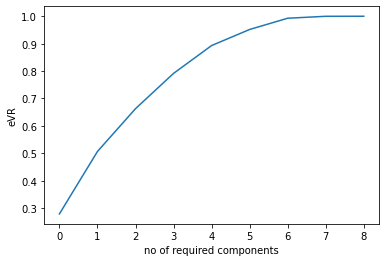

In [53]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("no of required components")
plt.ylabel("eVR")

In [54]:
pca.explained_variance_ratio_

array([2.79018192e-01, 2.27785798e-01, 1.56093777e-01, 1.28651383e-01,
       1.01555805e-01, 5.86261325e-02, 4.09953826e-02, 7.09477197e-03,
       1.78757536e-04])

# DECOMPOSITION

In [55]:
df = pd.read_csv('https://gist.githubusercontent.com/yifancui/e1d5ce0ba59ba0c275c0e2efed542a37/raw/dde7dbca24429542ff78964b83aaf064142dd771/data.csv')

In [56]:
df = df.drop(columns= ['Id number', 'Type of glass'], axis =1)

In [57]:
from sklearn.preprocessing import StandardScaler
sclar = StandardScaler()
scaled_data = scalar.fit_transform(df)

In [58]:
df1 = pd.DataFrame(scaled_data, columns=df.columns)

In [59]:
df1.head(3)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451


In [60]:
df1.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02
mean,-2.877034e-14,2.191393e-15,-1.328117e-16,-2.988264e-16,9.525091e-16,3.527811e-17,-3.154278e-16,-6.640586e-17,-3.735330e-17
std,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00
min,-2.381516e+00,-3.286943e+00,-1.865511e+00,-2.318616e+00,-3.676472e+00,-7.639186e-01,-2.484084e+00,-3.528768e-01,-5.864509e-01
25%,-6.082728e-01,-6.141580e-01,-3.957744e-01,-5.117560e-01,-4.800288e-01,-5.756501e-01,-5.049657e-01,-3.528768e-01,-5.864509e-01
50%,-2.262293e-01,-1.323817e-01,5.527787e-01,-1.704602e-01,1.799655e-01,8.905322e-02,-2.514132e-01,-3.528768e-01,-5.864509e-01
75%,2.614331e-01,5.120326e-01,6.361680e-01,3.715977e-01,5.649621e-01,1.735820e-01,1.518057e-01,-3.528768e-01,4.422417e-01
max,5.137232e+00,4.875637e+00,1.254639e+00,4.125851e+00,3.570524e+00,8.780145e+00,5.094318e+00,5.997210e+00,4.659881e+00


In [61]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(df1)

array([[ 1.15113957, -0.52948764, -0.37209565, ..., -0.39560005,
        -0.19716008,  0.01634649],
       [-0.57413717, -0.75978777, -0.55670817, ..., -0.02415793,
        -0.28421356, -0.0107898 ],
       [-0.94015972, -0.92983597, -0.55490744, ..., -0.36751757,
        -0.09594067,  0.02164019],
       ...,
       [-1.68024627,  3.28482346, -0.93034851, ...,  0.67412231,
        -0.89170969,  0.04628358],
       [-2.36974768,  2.7568728 , -1.23470076, ...,  0.67889932,
         0.07446015, -0.02730068],
       [-2.26264885,  3.02859155, -0.89084474, ...,  0.46246107,
         0.0633149 , -0.01944978]])

In [62]:
pd.DataFrame(pca.fit_transform(df1))

,0,1,2,3,4,5,6,7,8
0,1.151140,-0.529488,-0.372096,1.728901,-0.251936,0.340210,-0.395600,-0.197160,0.016346
1,-0.574137,-0.759788,-0.556708,0.760232,-0.257071,-0.115960,-0.024158,-0.284214,-0.010790
2,-0.940160,-0.929836,-0.554907,0.206254,-0.237506,0.126630,-0.367518,-0.095941,0.021640
3,-0.142083,-0.961677,-0.117125,0.415724,-0.476299,0.285805,-0.052497,-0.002959,0.092035
4,-0.351092,-1.091249,-0.485079,0.069102,-0.432090,0.298032,0.158570,-0.191316,0.002315
...,...,...,...,...,...,...,...,...,...
209,-2.383835,3.061677,0.090445,-0.376611,0.103227,0.231162,-1.320186,0.189401,-0.028657
210,-2.397652,3.108236,-1.117502,0.288454,0.624723,0.618056,0.582361,0.131651,-0.013663
211,-1.680246,3.284823,-0.930349,-0.171014,0.451687,1.247320,0.674122,-0.891710,0.046284
212,-2.369748,2.756873,-1.234701,-0.525285,0.515008,1.003352,0.678899,0.074460,-0.027301


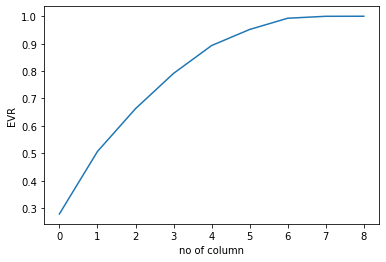

In [64]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('no of column')
plt.ylabel('EVR')
plt.show()

In [82]:
pca1 = PCA(n_components=5)
new_data = pca1.fit_transform(df1)

In [83]:
x = pd.DataFrame(new_data, columns=['pc1', 'pc2', 'pc3', 'pc4', 'pc5'])

In [84]:
x

,pc1,pc2,pc3,pc4,pc5
0,-1.431425,-1.102115,-1.066958,-0.158237,0.143080
1,-1.436707,0.343585,-0.277824,-0.293937,-0.194434
2,-1.427322,0.345720,0.138708,-0.321984,0.023720
3,-1.257825,-0.249060,0.057742,0.022271,0.002472
4,-1.312466,-0.018405,0.357510,-0.278564,-0.071025
...,...,...,...,...,...
209,2.273596,2.131266,-0.303368,0.213925,0.754221
210,1.758894,2.890519,-0.579363,-0.514717,0.570620
211,1.778878,2.731333,0.028322,-0.515026,0.797331
212,1.795894,2.715168,0.148468,-0.660904,0.694372


In [85]:
data1 = pd.read_csv('https://gist.githubusercontent.com/yifancui/e1d5ce0ba59ba0c275c0e2efed542a37/raw/dde7dbca24429542ff78964b83aaf064142dd771/data.csv')

In [86]:
data1.head(2)

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1


In [87]:
y = data1['Type of glass']

In [88]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
dt_model = DecisionTreeClassifier()
dt_model.fit(x,y)

DecisionTreeClassifier()

In [90]:
pca1.transform([[1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0]])

array([[-1.43142469, -1.10211499, -1.0669584 , -0.15823696,  0.14308027]])

In [92]:
dt_model.predict(pca1.transform(scalar.transform([[1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0]])))

array([1], dtype=int64)